# Climate Data Testing Notebook

Adhoc testing and exploration of NCEI API endpoints

## Setup

In [1]:
import sys
import os
from pathlib import Path

# Add parent directory to path to import src modules
project_root = Path.cwd().parent
sys.path.insert(0, str(project_root))

from src.ncei import NCEIClient
import pandas as pd
import json

In [2]:
# Initialize NCEI client
client = NCEIClient()
print("✓ Client initialized successfully")

✓ Client initialized successfully


## 1. Explore Available Datasets

In [3]:
# Get all available datasets
datasets = client.get_datasets()

print(f"Found {len(datasets.get('results', []))} datasets\n")
for ds in datasets.get('results', []):
    print(f"ID: {ds['id']}")
    print(f"Name: {ds['name']}")
    print(f"Date Range: {ds.get('mindate', 'N/A')} to {ds.get('maxdate', 'N/A')}")
    print(f"Coverage: {ds.get('datacoverage', 'N/A')}")
    print("-" * 80)

Found 11 datasets

ID: GHCND
Name: Daily Summaries
Date Range: 1763-01-01 to 2025-11-25
Coverage: 1
--------------------------------------------------------------------------------
ID: GSOM
Name: Global Summary of the Month
Date Range: 1763-01-01 to 2025-10-01
Coverage: 1
--------------------------------------------------------------------------------
ID: GSOY
Name: Global Summary of the Year
Date Range: 1763-01-01 to 2025-01-01
Coverage: 1
--------------------------------------------------------------------------------
ID: NEXRAD2
Name: Weather Radar (Level II)
Date Range: 1991-06-05 to 2025-11-26
Coverage: 0.95
--------------------------------------------------------------------------------
ID: NEXRAD3
Name: Weather Radar (Level III)
Date Range: 1994-05-20 to 2025-11-24
Coverage: 0.95
--------------------------------------------------------------------------------
ID: NORMAL_ANN
Name: Normals Annual/Seasonal
Date Range: 2010-01-01 to 2010-01-01
Coverage: 1
---------------------------

## 2. Search for Locations

In [4]:
# Search for cities (example: search for cities)
locations = client.get_locations(
    locationcategoryid='CITY',
    limit=10
)

print(f"Found {len(locations.get('results', []))} cities\n")
for loc in locations.get('results', []):
    print(f"ID: {loc['id']}")
    print(f"Name: {loc['name']}")
    print(f"Date Range: {loc.get('mindate', 'N/A')} to {loc.get('maxdate', 'N/A')}")
    print("-" * 60)

Found 10 cities

ID: CITY:AE000001
Name: Abu Dhabi, AE
Date Range: 1983-01-01 to 2025-08-24
------------------------------------------------------------
ID: CITY:AE000002
Name: Ajman, AE
Date Range: 1944-03-01 to 2025-08-24
------------------------------------------------------------
ID: CITY:AE000003
Name: Dubai, AE
Date Range: 1944-03-01 to 2025-08-24
------------------------------------------------------------
ID: CITY:AE000006
Name: Sharjah, AE
Date Range: 1944-03-01 to 2025-08-24
------------------------------------------------------------
ID: CITY:AF000007
Name: Kabul, AF
Date Range: 1966-03-02 to 2021-08-30
------------------------------------------------------------
ID: CITY:AF000008
Name: Kandahar, AF
Date Range: 1973-01-02 to 2020-12-31
------------------------------------------------------------
ID: CITY:AG000001
Name: Algiers, AG
Date Range: 1877-04-01 to 2025-08-24
------------------------------------------------------------
ID: CITY:AG000002
Name: Annaba, AG
Date Range: 1

In [ ]:
# Example: Get specific location details
# location_id = "CITY:US370003"  # New York City
# location_detail = client.get_locations(locationid=location_id)
# print(json.dumps(location_detail, indent=2))

## 3. Find Stations

In [5]:
# Find stations for a specific location and dataset
stations = client.get_stations(
    datasetid='GSOM',
    locationid='CITY:US370003',  # NYC example
    startdate='1950-01-01',
    enddate='2024-12-31',
    limit=10
)

print(f"Found {len(stations.get('results', []))} stations\n")
for station in stations.get('results', []):
    print(f"ID: {station['id']}")
    print(f"Name: {station['name']}")
    print(f"Location: {station.get('latitude', 'N/A')}, {station.get('longitude', 'N/A')}")
    print(f"Elevation: {station.get('elevation', 'N/A')}m")
    print(f"Date Range: {station.get('mindate', 'N/A')} to {station.get('maxdate', 'N/A')}")
    print(f"Coverage: {station.get('datacoverage', 'N/A')}")
    print("-" * 80)

Found 10 stations

ID: GHCND:US1NCAS0001
Name: WEST JEFFERSON 8.5 SSE, NC US
Location: 36.284139, -81.429158
Elevation: 971.1m
Date Range: 2007-11-01 to 2024-10-01
Coverage: 0.1912
--------------------------------------------------------------------------------
ID: GHCND:US1NCAS0002
Name: CRESTON 2.8 SW, NC US
Location: 36.4075, -81.6689
Elevation: 926.6m
Date Range: 2008-09-01 to 2025-10-01
Coverage: 0.6796
--------------------------------------------------------------------------------
ID: GHCND:US1NCAS0006
Name: TODD 1.5 E, NC US
Location: 36.310283, -81.5683
Elevation: 1001m
Date Range: 2010-01-01 to 2013-11-01
Coverage: 0.3831
--------------------------------------------------------------------------------
ID: GHCND:US1NCAS0010
Name: TODD 2.6 NE, NC US
Location: 36.3301, -81.5574
Elevation: 978.7m
Date Range: 2018-08-01 to 2019-11-01
Coverage: 0.1875
--------------------------------------------------------------------------------
ID: GHCND:US1NCAS0015
Name: CRESTON 2.0 W, NC US
Lo

## 4. Explore Data Types

In [6]:
# Get available data types for temperature
datatypes = client.get_datatypes(
    datasetid='GSOM',
    datacategoryid='TEMP',
    limit=20
)

print(f"Found {len(datatypes.get('results', []))} temperature data types\n")
for dt in datatypes.get('results', []):
    print(f"ID: {dt['id']}")
    print(f"Name: {dt.get('name', 'N/A')}")
    print("-" * 60)

Found 7 temperature data types

ID: CDSD
Name: Cooling Degree Days Season to Date
------------------------------------------------------------
ID: EMNT
Name: Extreme minimum temperature for the period.
------------------------------------------------------------
ID: EMXT
Name: Extreme maximum temperature for the period.
------------------------------------------------------------
ID: HDSD
Name: Heating Degree Days Season to Date
------------------------------------------------------------
ID: TAVG
Name: Average Temperature.
------------------------------------------------------------
ID: TMAX
Name: Maximum temperature
------------------------------------------------------------
ID: TMIN
Name: Minimum temperature
------------------------------------------------------------


## 5. Fetch Actual Climate Data

In [7]:
# Example: Get temperature data for a specific station
# Note: Update stationid with an actual station from the search above

data = client.get_data(
    datasetid='GSOM',
    stationid='GHCND:USW00094728',  # Example station
    datatypeid='TAVG',
    startdate='2020-01-01',
    enddate='2024-12-31',
    limit=100
)

print(f"Found {len(data.get('results', []))} data points\n")
for record in data.get('results', [])[:10]:  # Show first 10
    print(f"Date: {record['date']}")
    print(f"Value: {record['value']} {record.get('attributes', '')}")
    print(f"Datatype: {record['datatype']}")
    print("-" * 60)

Found 60 data points

Date: 2020-01-01T00:00:00
Value: 4.0 ,W
Datatype: TAVG
------------------------------------------------------------
Date: 2020-02-01T00:00:00
Value: 4.5 ,W
Datatype: TAVG
------------------------------------------------------------
Date: 2020-03-01T00:00:00
Value: 8.9 ,W
Datatype: TAVG
------------------------------------------------------------
Date: 2020-04-01T00:00:00
Value: 10.2 ,W
Datatype: TAVG
------------------------------------------------------------
Date: 2020-05-01T00:00:00
Value: 15.7 ,W
Datatype: TAVG
------------------------------------------------------------
Date: 2020-06-01T00:00:00
Value: 23.2 ,W
Datatype: TAVG
------------------------------------------------------------
Date: 2020-07-01T00:00:00
Value: 26.7 ,W
Datatype: TAVG
------------------------------------------------------------
Date: 2020-08-01T00:00:00
Value: 24.9 ,W
Datatype: TAVG
------------------------------------------------------------
Date: 2020-09-01T00:00:00
Value: 20.4 ,W
Data

## 6. Convert Data to DataFrame

In [8]:
# Convert climate data to pandas DataFrame for analysis
# Uncomment and run after fetching data above

if 'data' in locals() and 'results' in data:
    df = pd.DataFrame(data['results'])
    df['date'] = pd.to_datetime(df['date'])
    df['value'] = pd.to_numeric(df['value'])
    
    # Convert from tenths of degrees C to degrees C (if needed)
    if df['datatype'].iloc[0] in ['TAVG', 'TMIN', 'TMAX']:
        df['value'] = df['value'] / 10.0
    
    print(df.head())
    print(f"\nDataFrame shape: {df.shape}")
    print(f"Date range: {df['date'].min()} to {df['date'].max()}")

        date datatype            station attributes  value
0 2020-01-01     TAVG  GHCND:USW00094728         ,W   0.40
1 2020-02-01     TAVG  GHCND:USW00094728         ,W   0.45
2 2020-03-01     TAVG  GHCND:USW00094728         ,W   0.89
3 2020-04-01     TAVG  GHCND:USW00094728         ,W   1.02
4 2020-05-01     TAVG  GHCND:USW00094728         ,W   1.57

DataFrame shape: (60, 5)
Date range: 2020-01-01 00:00:00 to 2024-12-01 00:00:00


## 7. Quick Visualization

Matplotlib is building the font cache; this may take a moment.


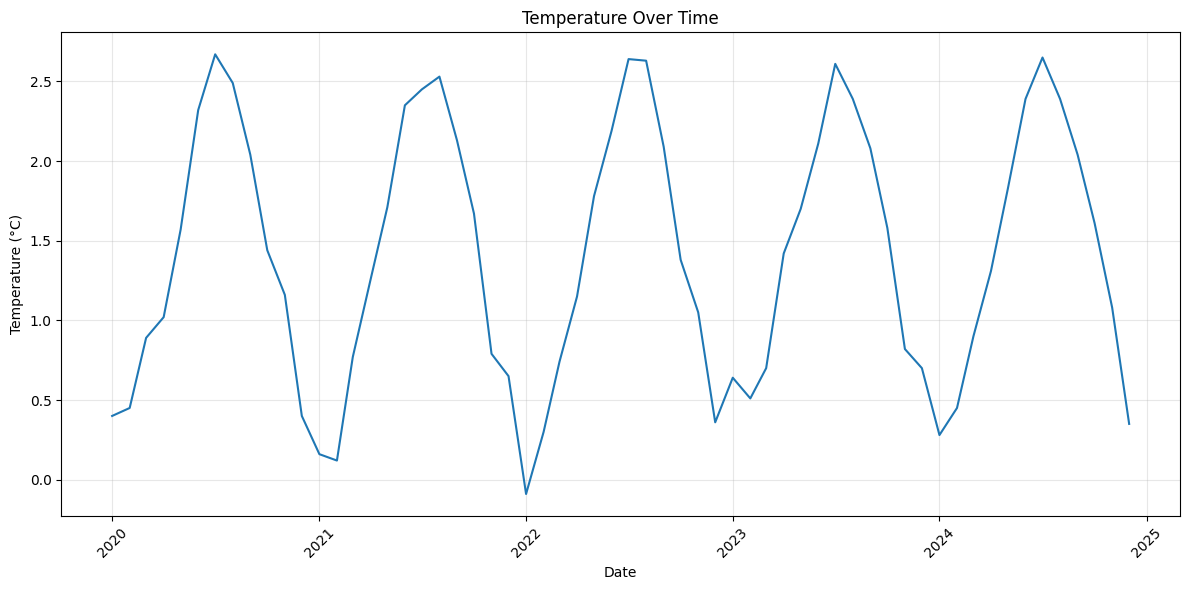

In [10]:
import matplotlib.pyplot as plt

if 'df' in locals():
    plt.figure(figsize=(12, 6))
    plt.plot(df['date'], df['value'])
    plt.title('Temperature Over Time')
    plt.xlabel('Date')
    plt.ylabel('Temperature (°C)')
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## 8. Helper: Fetch All Pages

In [ ]:
# Example: Fetch all stations for a location (using pagination helper)
# all_stations = client.get_all_pages(
#     'get_stations',
#     datasetid='GSOM',
#     locationid='CITY:US370003',
#     startdate='1950-01-01',
#     enddate='2024-12-31',
#     max_results=500
# )
# 
# print(f"Fetched {len(all_stations)} stations total")

## Scratch Space

Use the cells below for adhoc testing

In [ ]:
# Your code here
